#Practica 6

In [7]:
from google.colab import drive
drive.mount ('/content/drive')
import random
import matplotlib.pyplot as plt
from statistics import*
import pandas as pd
import math
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
autos=pd.read_csv('/autos2.csv')
print(autos)

     symboling  normalized-losses         make fuel-type aspiration  \
0            3              122.0  alfa-romero       gas        std   
1            3              122.0  alfa-romero       gas        std   
2            1              122.0  alfa-romero       gas        std   
3            2              164.0         audi       gas        std   
4            2              164.0         audi       gas        std   
..         ...                ...          ...       ...        ...   
200         -1               95.0        volvo       gas        std   
201         -1               95.0        volvo       gas      turbo   
202         -1               95.0        volvo       gas        std   
203         -1               95.0        volvo    diesel      turbo   
204         -1               95.0        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88

In [9]:
print("Precio minimo de los autos: ",autos.price.min())

Precio minimo de los autos:  5118.0


In [10]:
print("Precio máximo de los autos: ",autos.price.max())

Precio máximo de los autos:  45400.0


In [11]:
m=mode(autos.price)
print("Moda de los precios de los autos: ",m)

Moda de los precios de los autos:  16500.0


In [12]:
print("Media de los precios de los autos: ",autos.price.mean())

Media de los precios de los autos:  13207.129353233831


In [13]:
me=median(autos.price)
print("Mediana de los precios de los autos: ",me)

Mediana de los precios de los autos:  18150.0


In [14]:
autos = autos.fillna(autos.mean())
d=stdev(autos.price)
print("Desviacion estandar de los precios: ",d)
print("\n")

Desviacion estandar de los precios:  7868.7682123438




<ipython-input-14-fb6345dd192a>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  autos = autos.fillna(autos.mean())


In [15]:
autos.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,31.681008,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.519211,476.979093,6.542142,6.886443,7868.768212
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10595.000000
75%,2.000000,137.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [16]:
n=len(autos.price)
k=int(1+math.log2(n))
stur=pd.cut(autos.price,bins=k).value_counts().reset_index()
stur.columns=("Precios","Autos")
stur

,Precios,Autos
0,"(5077.718, 10153.25]",98
1,"(10153.25, 15188.5]",46
2,"(15188.5, 20223.75]",36
3,"(20223.75, 25259.0]",8
4,"(30294.25, 35329.5]",7
5,"(35329.5, 40364.75]",4
6,"(25259.0, 30294.25]",3
7,"(40364.75, 45400.0]",3


Text(0, 0.5, 'autos')

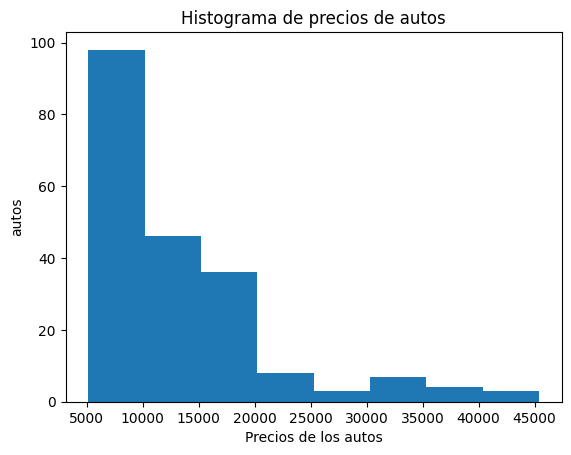

In [17]:
plt.hist(autos.price, bins=k)
plt.title("Histograma de precios de autos")
plt.xlabel("Precios de los autos")
plt.ylabel("autos")

Text(0.5, 0, 'Precio')

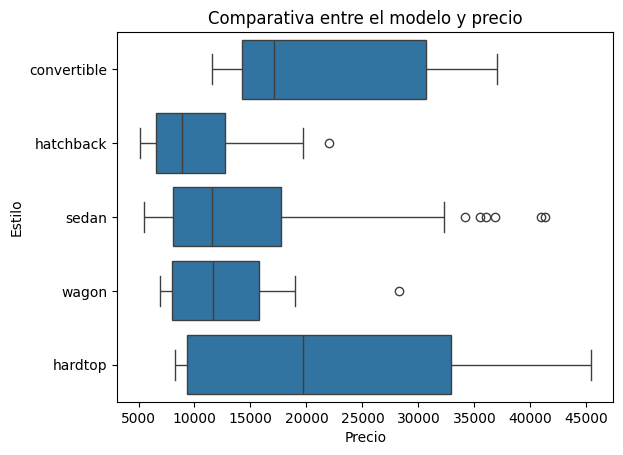

In [18]:
sns.boxplot(x=autos["price"], y=autos["body-style"], data=autos)
plt.title("Comparativa entre el modelo y precio")
plt.ylabel('Estilo')
plt.xlabel('Precio')

Text(0.5, 0, 'Precio')

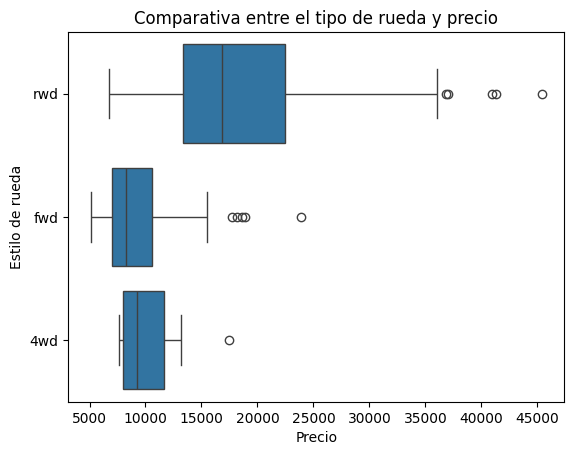

In [19]:
sns.boxplot(x=autos["price"], y=autos["drive-wheels"], data=autos)
plt.title("Comparativa entre el tipo de rueda y precio")
plt.ylabel('Estilo de rueda')
plt.xlabel('Precio')

Text(0.5, 0, 'Precio')

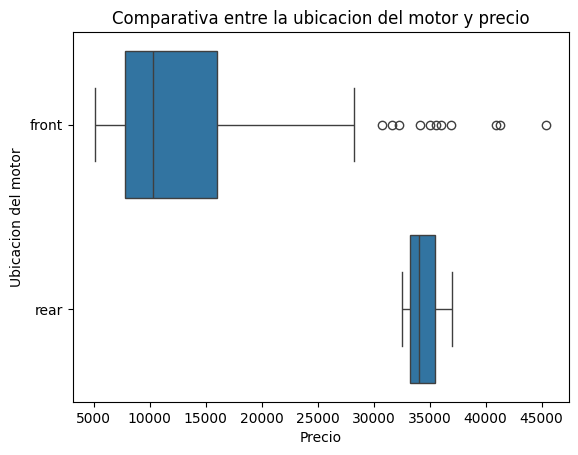

In [20]:
sns.boxplot(x=autos["price"], y=autos["engine-location"], data=autos)
plt.title("Comparativa entre la ubicacion del motor y precio")
plt.ylabel('Ubicacion del motor')
plt.xlabel('Precio')

##Conclusiones generales
###En la lista se ven un montón de datos variados que han sido anotados. Gracias a la estadística, se pueden organizar y entender mejor las diferencias y similitudes entre esos datos. La estadística nos ayuda a notar cosas que, de otra manera, pasarían desapercibidas. Así que, podemos sacar conclusiones sobre cosas como cuánto se vende en relación con las especificaciones de los autos, y cómo se relacionan los precios con los modelos de los coches.